In [ ]:
import numpy as np
import cv2
from imutils import paths
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report

In [ ]:
print(tf.__version__)

2.13.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


train data

In [ ]:
train_elephants= "/content/gdrive/MyDrive/new/data/train/elephant"
train_non_elephants = "/content/gdrive/MyDrive/new/data/train/non_elephant"

In [ ]:
train_elephantPaths = list(paths.list_images(train_elephants))
train_nonelephantPaths = list(paths.list_images(train_non_elephants))
print(train_elephantPaths[:10])

['/content/gdrive/MyDrive/new/data/train/elephant/af_tr398.jpg', '/content/gdrive/MyDrive/new/data/train/elephant/af_tr406.jpg', '/content/gdrive/MyDrive/new/data/train/elephant/af_tr404.jpg', '/content/gdrive/MyDrive/new/data/train/elephant/af_tr408.jpg', '/content/gdrive/MyDrive/new/data/train/elephant/af_tr407.jpg', '/content/gdrive/MyDrive/new/data/train/elephant/af_tr409.jpg', '/content/gdrive/MyDrive/new/data/train/elephant/af_tr403.jpg', '/content/gdrive/MyDrive/new/data/train/elephant/af_tr405.jpg', '/content/gdrive/MyDrive/new/data/train/elephant/af_tr415.jpg', '/content/gdrive/MyDrive/new/data/train/elephant/af_tr416.jpg']


In [ ]:
x_train=[]
print('length of elephant data',len(train_elephantPaths))
print('length of non elephant data',len(train_nonelephantPaths))
train_combinedDataset = train_elephantPaths + train_nonelephantPaths
print('length of combined dataset:',len(train_combinedDataset))
for imagePath in train_combinedDataset:
  print('imagePath:', imagePath)
  imageArray = cv2.imread(imagePath)
  imageSize = 50
  newImageArray  = cv2.resize(imageArray, (imageSize, imageSize))
  x_train.append(newImageArray)

length of elephant data 1337
length of non elephant data 1273
length of combined dataset: 2610
imagePath: /content/gdrive/MyDrive/new/data/train/elephant/af_tr398.jpg
imagePath: /content/gdrive/MyDrive/new/data/train/elephant/af_tr406.jpg
imagePath: /content/gdrive/MyDrive/new/data/train/elephant/af_tr404.jpg
imagePath: /content/gdrive/MyDrive/new/data/train/elephant/af_tr408.jpg
imagePath: /content/gdrive/MyDrive/new/data/train/elephant/af_tr407.jpg
imagePath: /content/gdrive/MyDrive/new/data/train/elephant/af_tr409.jpg
imagePath: /content/gdrive/MyDrive/new/data/train/elephant/af_tr403.jpg
imagePath: /content/gdrive/MyDrive/new/data/train/elephant/af_tr405.jpg
imagePath: /content/gdrive/MyDrive/new/data/train/elephant/af_tr415.jpg
imagePath: /content/gdrive/MyDrive/new/data/train/elephant/af_tr416.jpg
imagePath: /content/gdrive/MyDrive/new/data/train/elephant/af_tr413.jpeg
imagePath: /content/gdrive/MyDrive/new/data/train/elephant/af_tr414.jpg
imagePath: /content/gdrive/MyDrive/new/d

In [ ]:
y_train = np.array([1]*len(train_elephantPaths) + [0]*(len(train_nonelephantPaths)))
x_train = np.array(x_train)
print('length of y:', len(y_train))
print('shape of x:', x_train.shape)
print('shape of y:', y_train.shape)

length of y: 2610
shape of x: (2610, 50, 50, 3)
shape of y: (2610,)


test

In [ ]:
test_elephants= "/content/gdrive/MyDrive/new/data/test/elephant"
test_non_elephants = "/content/gdrive/MyDrive/new/data/test/non_elephant"

In [ ]:
test_elephantPaths = list(paths.list_images(test_elephants))
test_nonelephantPaths = list(paths.list_images(test_non_elephants))
print(test_elephantPaths[:10])

['/content/gdrive/MyDrive/new/data/test/elephant/af_te1.jpg', '/content/gdrive/MyDrive/new/data/test/elephant/af_te10.jpg', '/content/gdrive/MyDrive/new/data/test/elephant/af_te11.jpg', '/content/gdrive/MyDrive/new/data/test/elephant/af_te12.jpg', '/content/gdrive/MyDrive/new/data/test/elephant/af_te14.jpg', '/content/gdrive/MyDrive/new/data/test/elephant/af_te13.jpg', '/content/gdrive/MyDrive/new/data/test/elephant/af_te15.jpg', '/content/gdrive/MyDrive/new/data/test/elephant/af_te16.jpg', '/content/gdrive/MyDrive/new/data/test/elephant/af_te17.jpg', '/content/gdrive/MyDrive/new/data/test/elephant/af_te18.jpg']


In [ ]:
x_test=[]
print('length of elephant data',len(test_elephantPaths))
print('length of non elephant data',len(test_nonelephantPaths))
test_combinedDataset = test_elephantPaths + test_nonelephantPaths
print('length of combined dataset:',len(test_combinedDataset))
for imagePath in test_combinedDataset:
  print('imagePath:', imagePath)
  imageArray = cv2.imread(imagePath)
  imageSize = 50
  newImageArray  = cv2.resize(imageArray, (imageSize, imageSize))
  x_test.append(newImageArray)

length of elephant data 188
length of non elephant data 151
length of combined dataset: 339
imagePath: /content/gdrive/MyDrive/new/data/test/elephant/af_te1.jpg
imagePath: /content/gdrive/MyDrive/new/data/test/elephant/af_te10.jpg
imagePath: /content/gdrive/MyDrive/new/data/test/elephant/af_te11.jpg
imagePath: /content/gdrive/MyDrive/new/data/test/elephant/af_te12.jpg
imagePath: /content/gdrive/MyDrive/new/data/test/elephant/af_te14.jpg
imagePath: /content/gdrive/MyDrive/new/data/test/elephant/af_te13.jpg
imagePath: /content/gdrive/MyDrive/new/data/test/elephant/af_te15.jpg
imagePath: /content/gdrive/MyDrive/new/data/test/elephant/af_te16.jpg
imagePath: /content/gdrive/MyDrive/new/data/test/elephant/af_te17.jpg
imagePath: /content/gdrive/MyDrive/new/data/test/elephant/af_te18.jpg
imagePath: /content/gdrive/MyDrive/new/data/test/elephant/af_te19.jpg
imagePath: /content/gdrive/MyDrive/new/data/test/elephant/af_te2.jpg
imagePath: /content/gdrive/MyDrive/new/data/test/elephant/af_te20.jpg


In [ ]:
y_test = np.array([1]*len(test_elephantPaths) + [0]*(len(test_nonelephantPaths)))
x_test = np.array(x_test)
print('length of y:', len(y_test))
print('shape of x:', x_test.shape)
print('shape of y:', y_test.shape)

length of y: 339
shape of x: (339, 50, 50, 3)
shape of y: (339,)


traing the model

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.layers import MaxPool2D
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import Dense



In [ ]:
# model=Sequential()
# model.add(Conv2D(32,(3,3),activation='relu',input_shape=(50,50,3)))
# model.add(MaxPool2D(2,2))
# model.add(Flatten())
# model.add(Dense(100,activation='relu'))
# model.add(Dense(10,activation='softmax'))
# model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.fit(x_train, y_train, epochs=10)

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(50, 50, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
82/82 [==============================] - 9s 94ms/step - loss: 0.6926 - accuracy: 0.5238
Epoch 2/20
82/82 [==============================] - 8s 101ms/step - loss: 0.6620 - accuracy: 0.6019
Epoch 3/20
82/82 [==============================] - 8s 98ms/step - loss: 0.6199 - accuracy: 0.6590
Epoch 4/20
82/82 [==============================] - 6s 71ms/step - loss: 0.5949 - accuracy: 0.6831
Epoch 5/20
82/82 [==============================] - 8s 94ms/step - loss: 0.5664 - accuracy: 0.7042
Epoch 6/20
82/82 [==============================] - 6s 75ms/step - loss: 0.5242 - accuracy: 0.7425
Epoch 7/20
82/82 [==============================] - 7s 84ms/step - loss: 0.4771 - accuracy: 0.7759
Epoch 8/20
82/82 [==============================] - 7s 86ms/step - loss: 0.4441 - accuracy: 0.7881
Epoch 9/20
82/82 [==============================] - 6s 72ms/step - loss: 0.4064 - accuracy: 0.8100
Epoch 10/20
82/82 [==============================] - 8s 96ms/step - loss: 0.3550 - accuracy: 0.8379
Epoch 11

In [ ]:
model.evaluate(x_test, y_test)

11/11 [==============================] - 1s 41ms/step - loss: 0.6556 - accuracy: 0.8289


[0.6555688381195068, 0.8289085626602173]

In [ ]:
y_preds = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_preds]
print('classfication report:' , classification_report(y_test, y_pred_classes))

11/11 [==============================] - 0s 23ms/step
classfication report:               precision    recall  f1-score   support

           0       0.83      0.77      0.80       151
           1       0.83      0.87      0.85       188

    accuracy                           0.83       339
   macro avg       0.83      0.82      0.83       339
weighted avg       0.83      0.83      0.83       339



In [ ]:
classes=["non_elephant","elephant"]

In [ ]:
def predict(path):
  imageArray = cv2.imread(path)
  plt.imshow(imageArray)
  plt.show()
  newImageArray  = cv2.resize(imageArray, (imageSize, imageSize))
  # plt.imshow(newImageArray)
  # plt.show()
  image = np.array(newImageArray, dtype="float32")
  image= np.expand_dims(image, axis=0)
  prediction  = model.predict(image)
  index = np.argmax(prediction[0],axis=0)
  print('prediction:', classes[index])

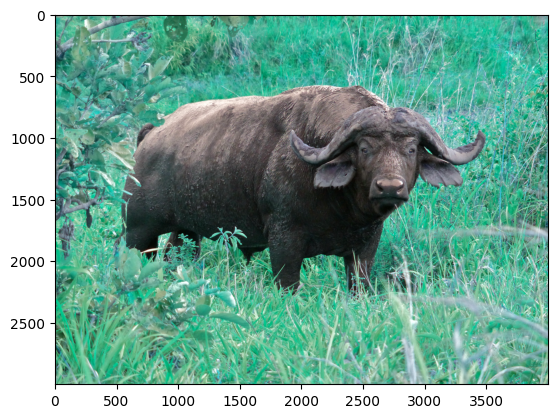

1/1 [==============================] - 0s 116ms/step
prediction: non_elephant


In [ ]:
predict(test_nonelephantPaths[10])

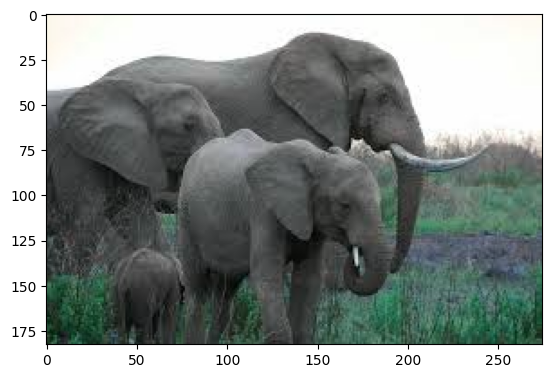

1/1 [==============================] - 0s 37ms/step
prediction: elephant


In [ ]:
predict(test_elephantPaths[10])

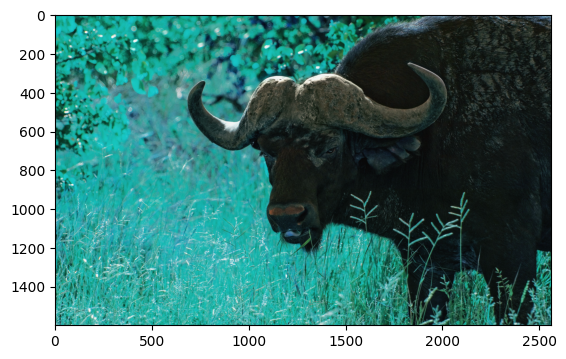

1/1 [==============================] - 0s 39ms/step
prediction: non_elephant


In [ ]:
predict(test_nonelephantPaths[1])

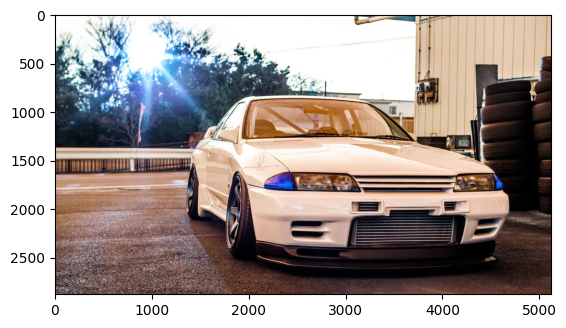

1/1 [==============================] - 0s 32ms/step
prediction: non_elephant


In [ ]:
predict(test_nonelephantPaths[100])

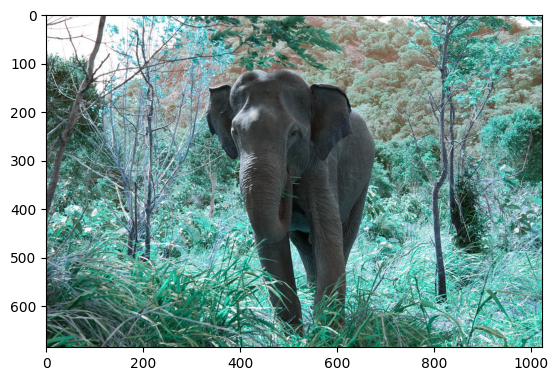

1/1 [==============================] - 0s 58ms/step
prediction: non_elephant


In [ ]:
predict(test_elephantPaths[100])

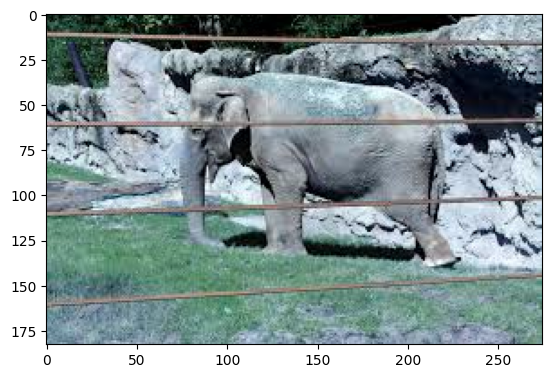

1/1 [==============================] - 0s 36ms/step
prediction: elephant


In [ ]:
predict(test_elephantPaths[110])

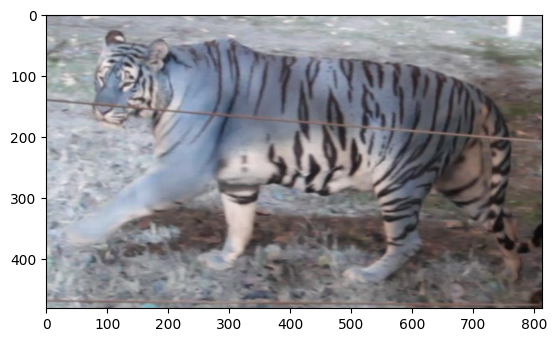

1/1 [==============================] - 0s 38ms/step
prediction: non_elephant


In [ ]:
predict(test_nonelephantPaths[75])

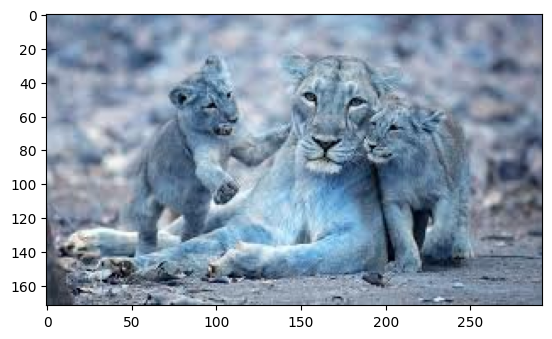

1/1 [==============================] - 0s 28ms/step
prediction: non_elephant


In [ ]:
predict(test_nonelephantPaths[85])

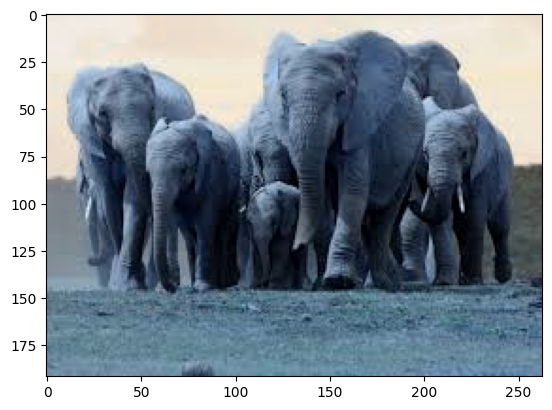

1/1 [==============================] - 0s 33ms/step
prediction: elephant


In [ ]:
predict("/content/elephants2.jpg")

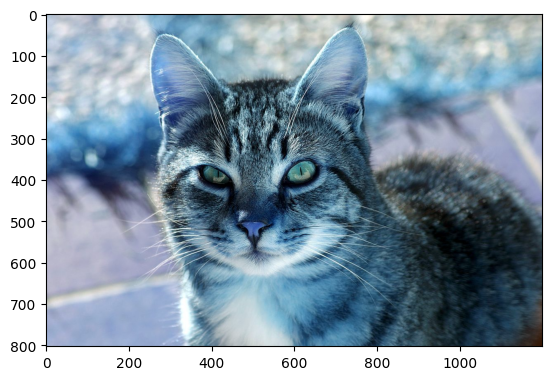

1/1 [==============================] - 0s 27ms/step
prediction: elephant


In [ ]:
predict("/content/A-Cat.jpg")

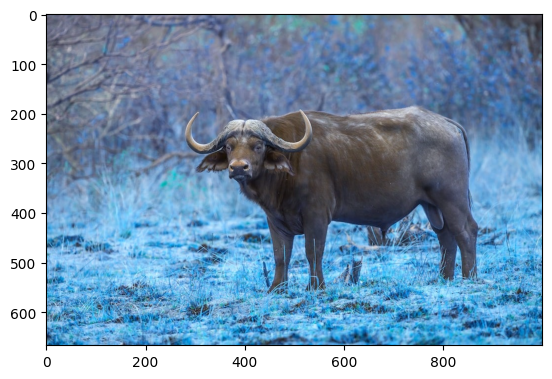

1/1 [==============================] - 0s 38ms/step
prediction: non_elephant


In [ ]:
predict("/content/buffalo.jpg")

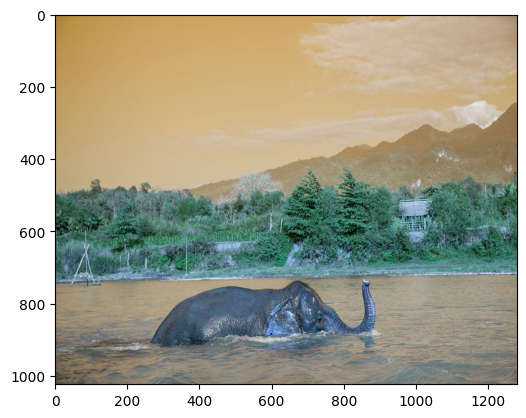

1/1 [==============================] - 0s 30ms/step
prediction: elephant


In [ ]:
predict("/content/elephant3.jpg")

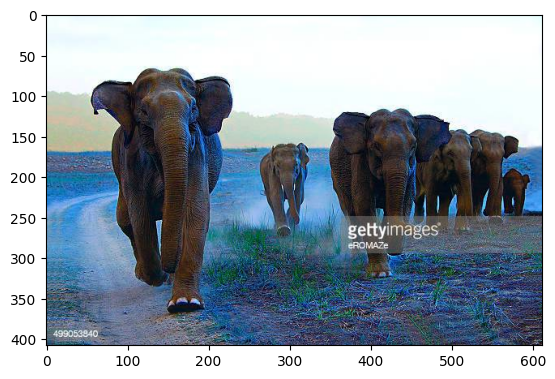

1/1 [==============================] - 0s 38ms/step
prediction: elephant


In [ ]:
predict("/content/elephants1.jpg")

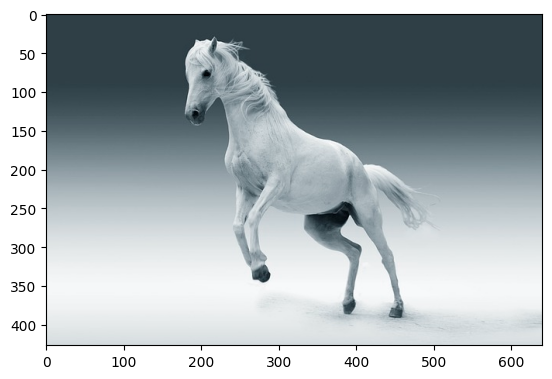

1/1 [==============================] - 0s 25ms/step
prediction: non_elephant


In [ ]:
predict("/content/horse1.jpg")

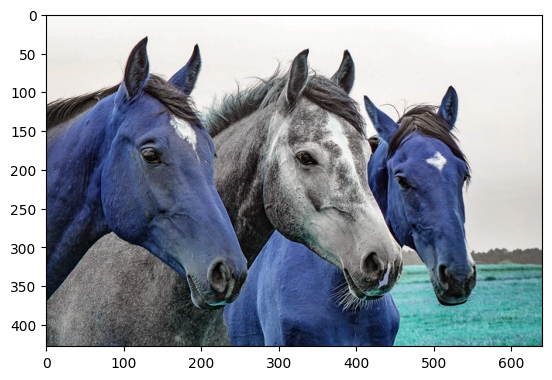

1/1 [==============================] - 0s 32ms/step
prediction: non_elephant


In [ ]:
predict("/content/horses2.jpg")

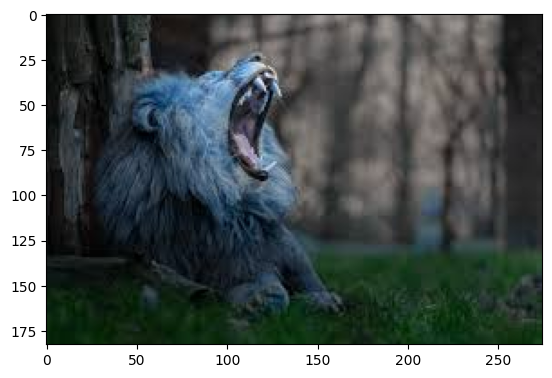

1/1 [==============================] - 0s 30ms/step
prediction: non_elephant


In [ ]:
predict("/content/lion1.jpg")

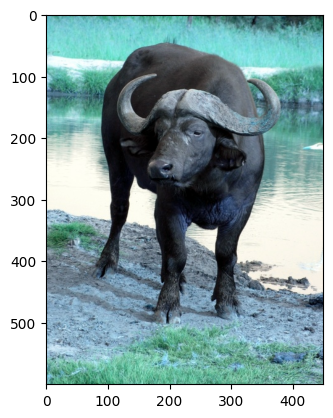

1/1 [==============================] - 0s 47ms/step
prediction: elephant


In [ ]:
predict("/content/water_buffalo_africa_animal_220184.jpg")

saving the model

In [ ]:
model.save('./gdrive/MyDrive/new/cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = tf.keras.models.load_model('./gdrive/MyDrive/new/cnn_model.h5')

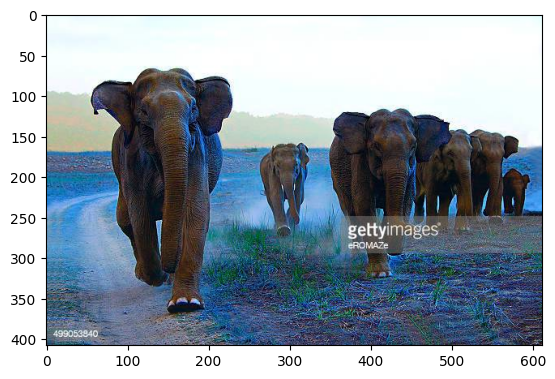

1/1 [==============================] - 0s 44ms/step
prediction: elephant


In [ ]:
imageArray = cv2.imread("/content/elephants1.jpg")
plt.imshow(imageArray)
plt.show()
newImageArray  = cv2.resize(imageArray, (imageSize, imageSize))
# plt.imshow(newImageArray)
# plt.show()
image = np.array(newImageArray, dtype="float32")
image= np.expand_dims(image, axis=0)
prediction  = new_model.predict(image)
index = np.argmax(prediction[0],axis=0)
print('prediction:', classes[index])